In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_dir = r'new_data'

train_negative_dir = os.path.join(train_dir, 'Negative')
train_positive_dir = os.path.join(train_dir, 'Positive')


In [3]:
batch_size = 100
epochs = 20
img_height = 128
img_width = 128

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary')

Found 40620 images belonging to 2 classes.


In [6]:
print(train_data_gen.class_indices)

{'Negative': 0, 'Positive': 1}


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.25) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 30465 images belonging to 2 classes.
Found 10155 images belonging to 2 classes.


In [8]:
validation_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [9]:
sample_training_images, y = next(train_data_gen)

In [10]:
y

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

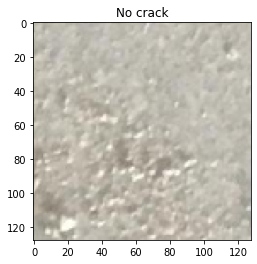

In [11]:
status=["No crack", "Crack"]
i=1
plt.imshow(sample_training_images[i])
plt.title(status[int(y[i])])
plt.show()

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    i=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

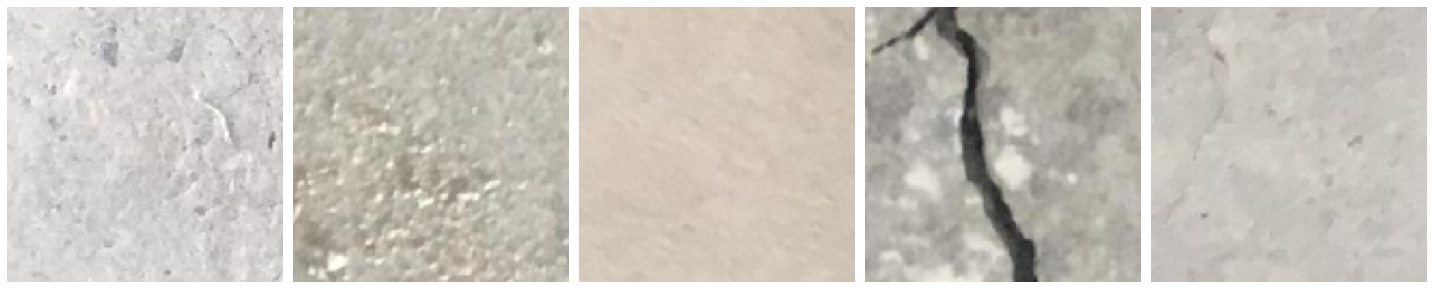

In [13]:
plotImages(sample_training_images[:5])

In [14]:
# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [15]:

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
import keras
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [18]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

100
1.0


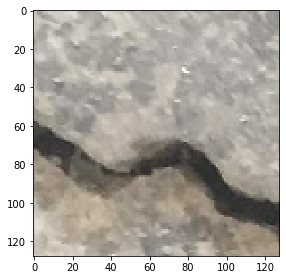

0.0


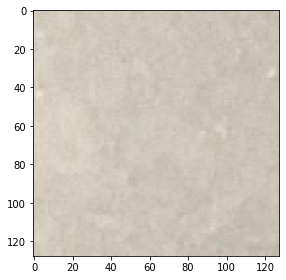

0.0


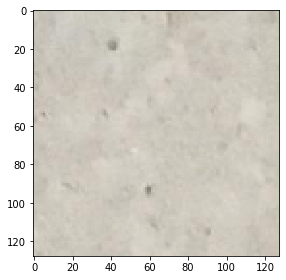

1.0


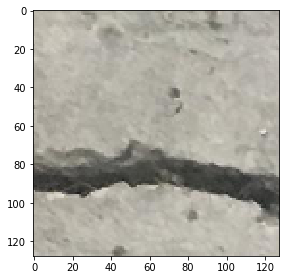

0.0


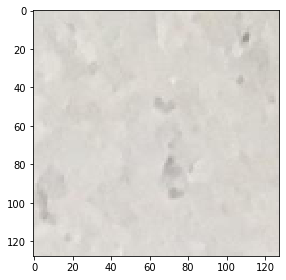

1.0


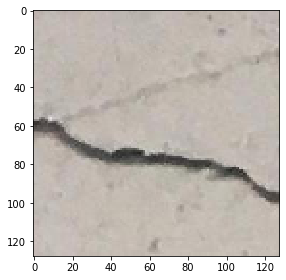

1.0


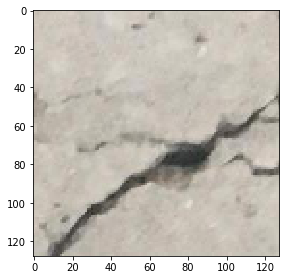

0.0


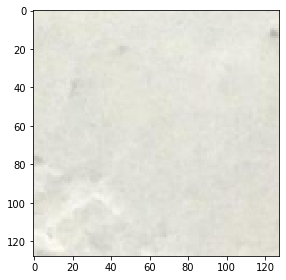

1.0


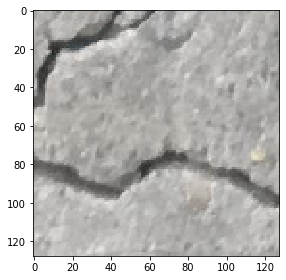

1.0


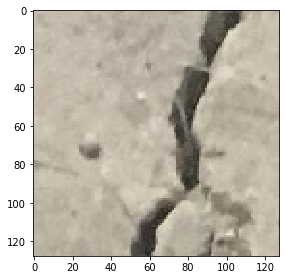

1.0


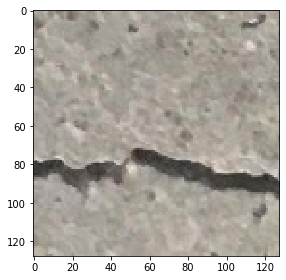

1.0


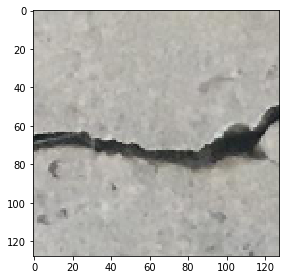

0.0


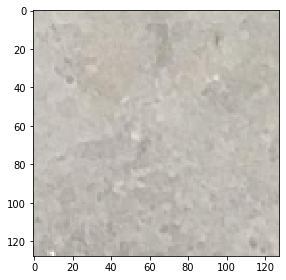

1.0


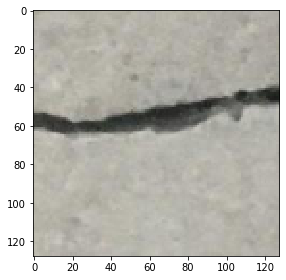

0.0


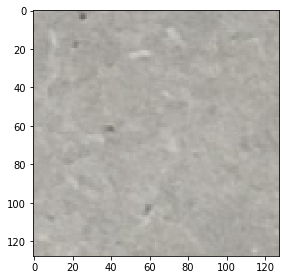

0.0


/home/becode/Skybase/venv/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


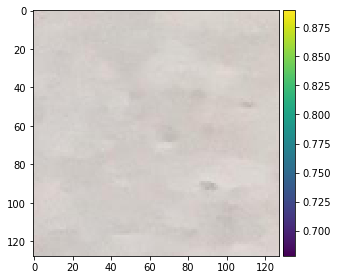

0.0


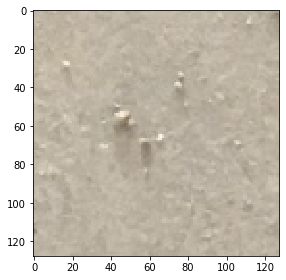

0.0


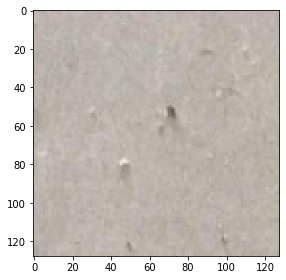

0.0


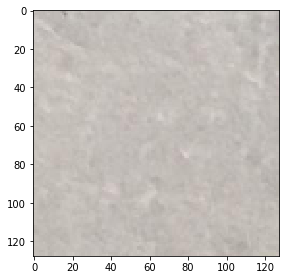

0.0


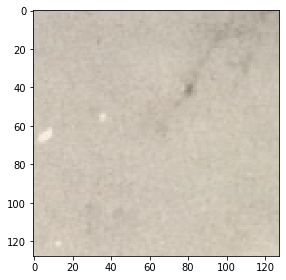

0.0


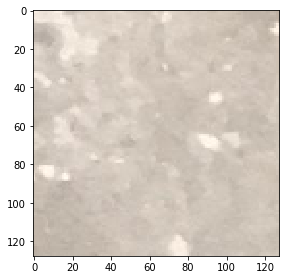

1.0


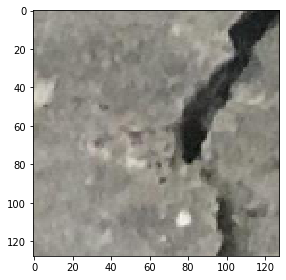

1.0


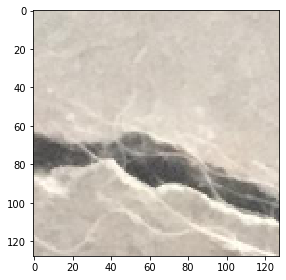

0.0


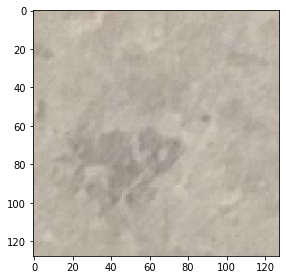

0.0


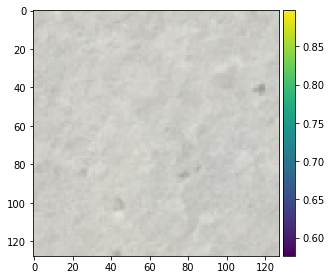

0.0


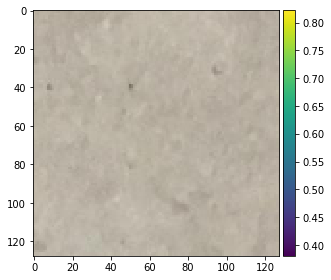

1.0


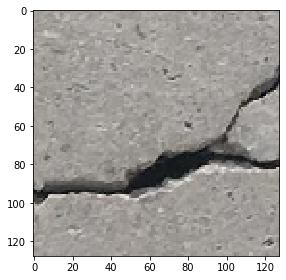

0.0


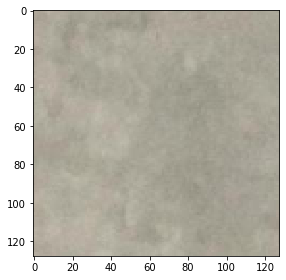

1.0


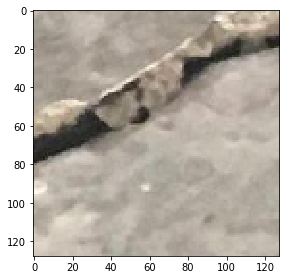

0.0


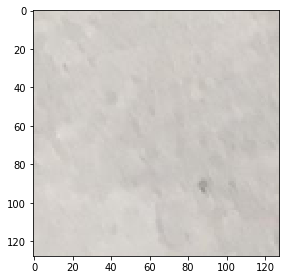

0.0


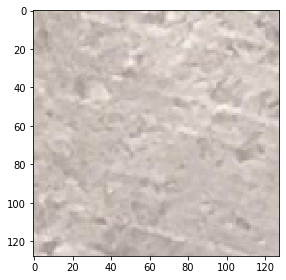

0.0


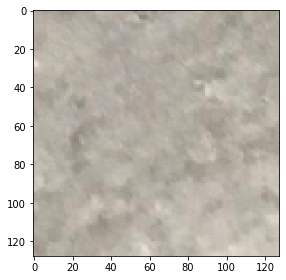

1.0


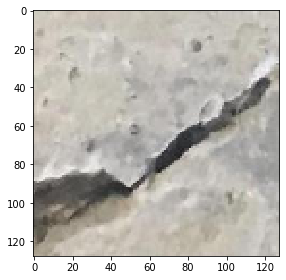

1.0


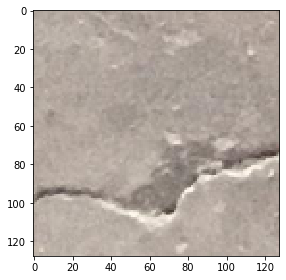

1.0


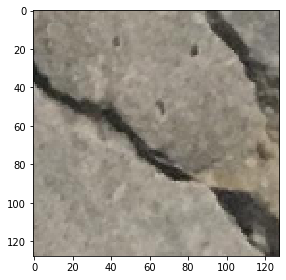

0.0


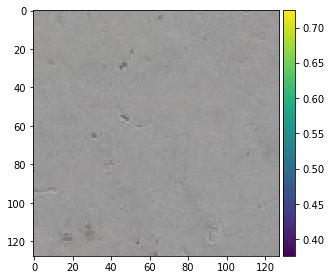

1.0


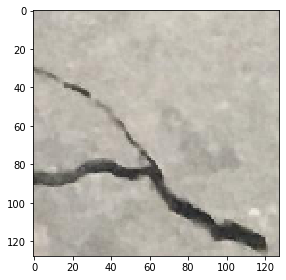

0.0


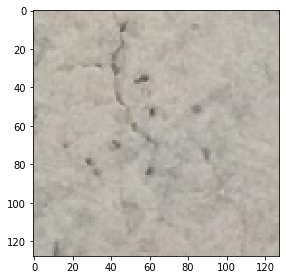

0.0


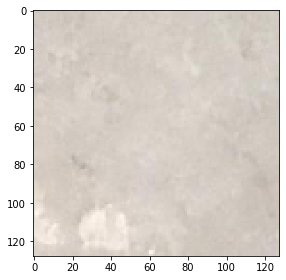

1.0


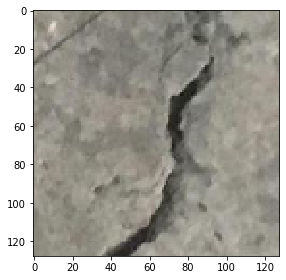

1.0


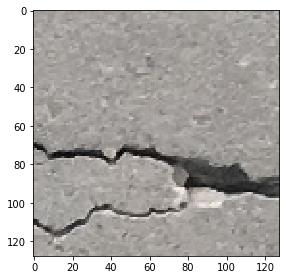

1.0


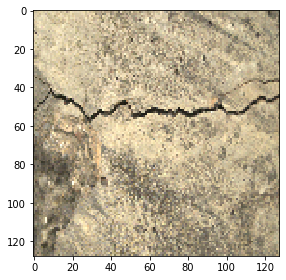

0.0


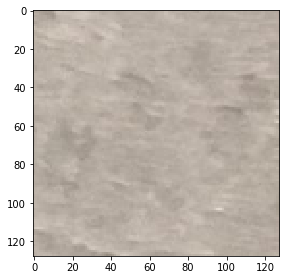

0.0


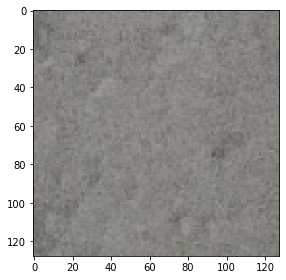

0.0


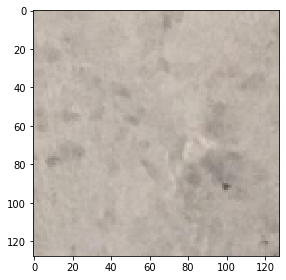

1.0


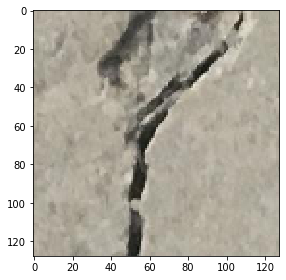

1.0


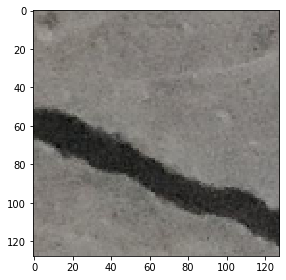

0.0


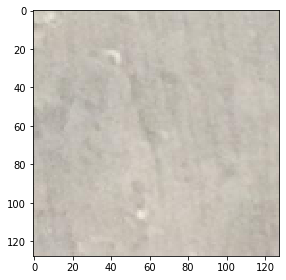

1.0


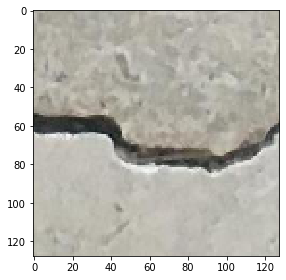

0.0


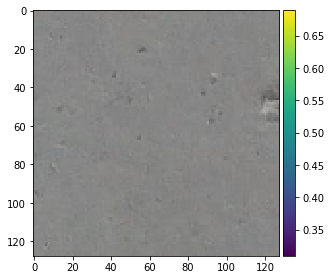

1.0


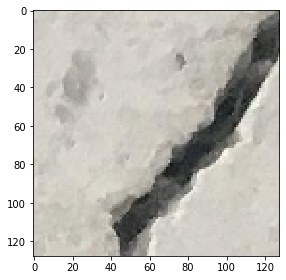

0.0


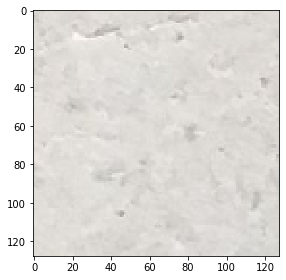

1.0


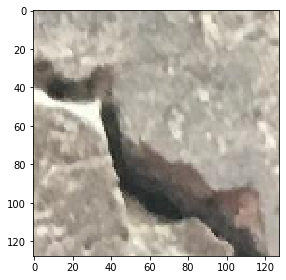

0.0


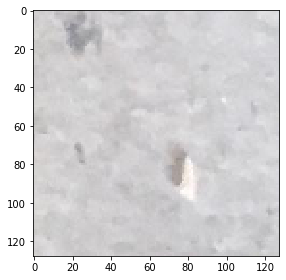

0.0


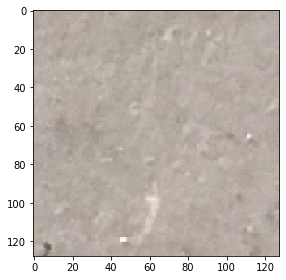

1.0


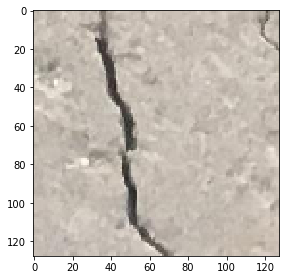

0.0


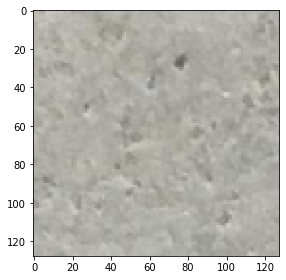

1.0


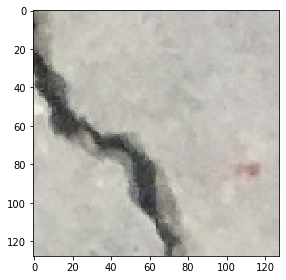

0.0


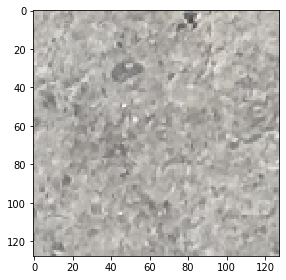

0.0


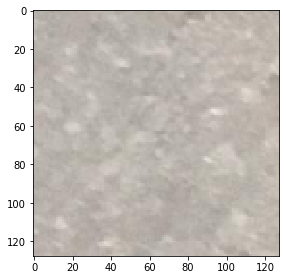

0.0


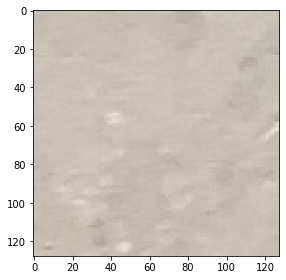

0.0


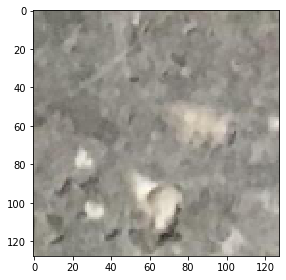

0.0


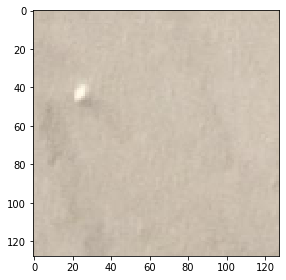

1.0


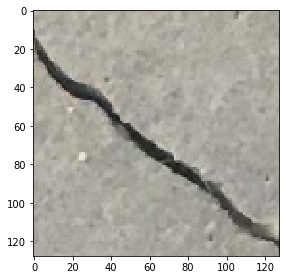

1.0


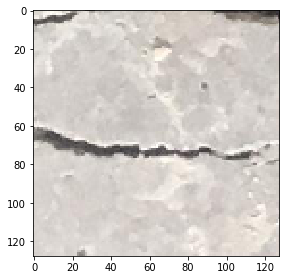

0.0


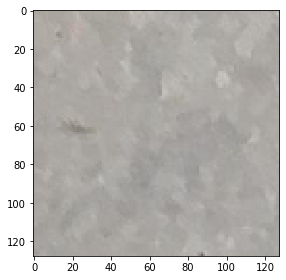

0.0


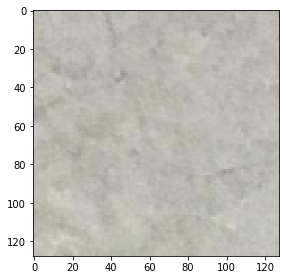

0.0


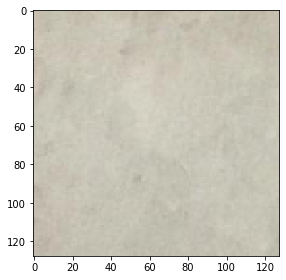

1.0


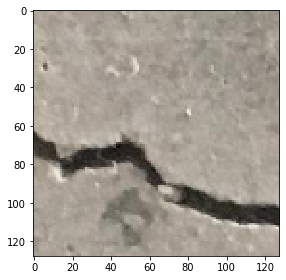

0.0


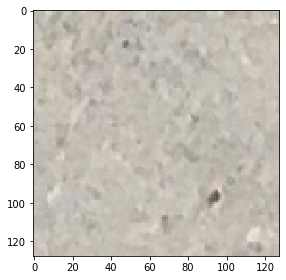

1.0


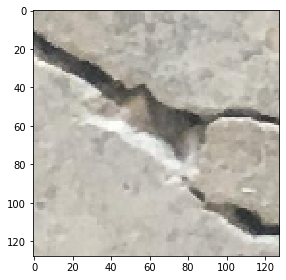

0.0


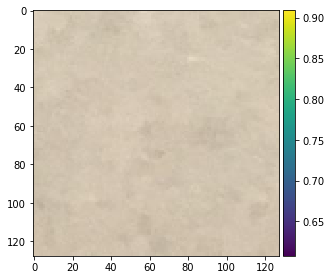

0.0


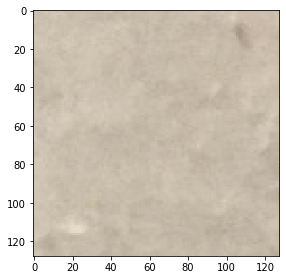

0.0


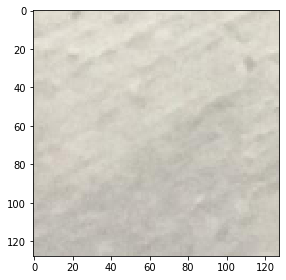

1.0


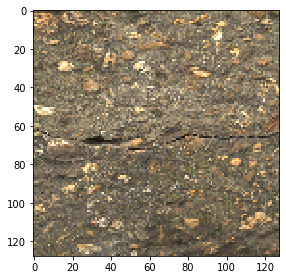

0.0


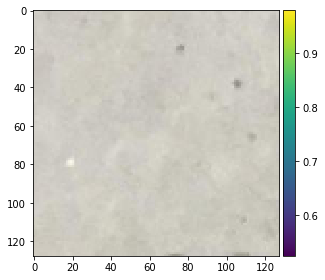

1.0


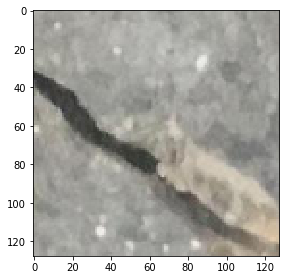

0.0


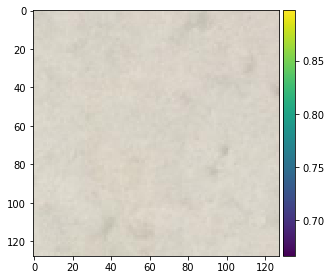

1.0


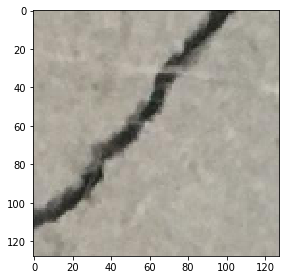

1.0


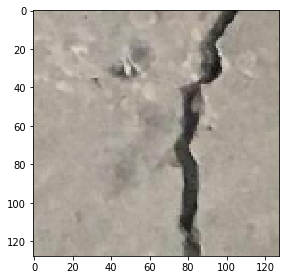

1.0


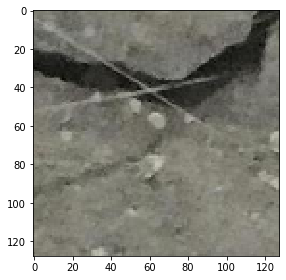

1.0


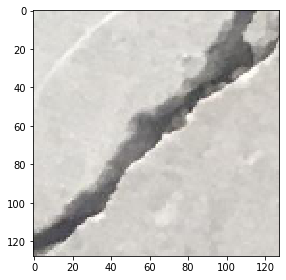

0.0


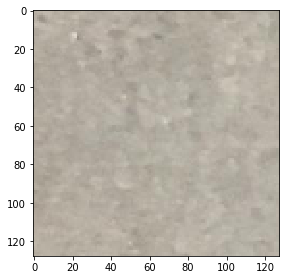

0.0


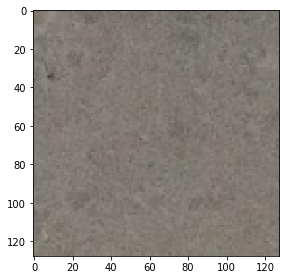

0.0


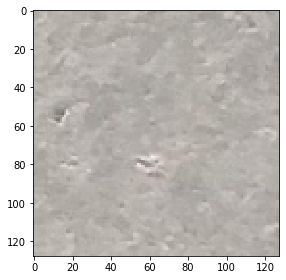

1.0


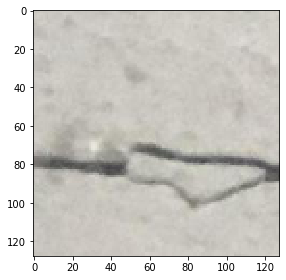

0.0


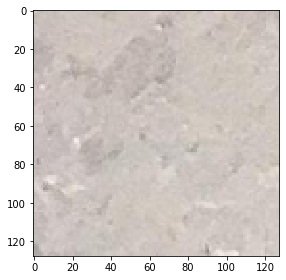

0.0


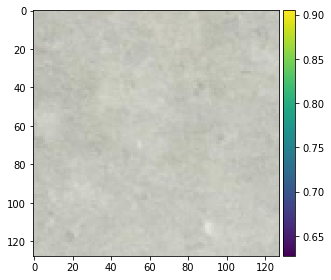

0.0


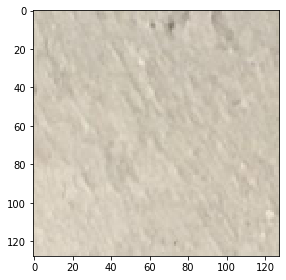

0.0


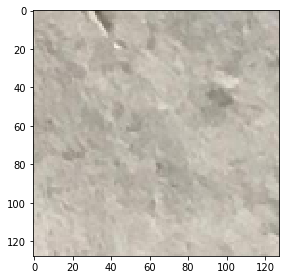

1.0


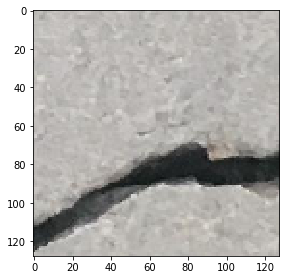

1.0


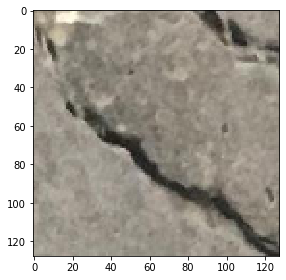

0.0


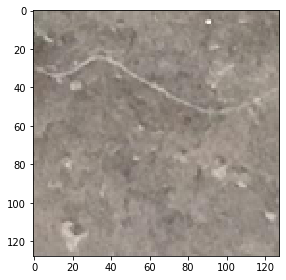

0.0


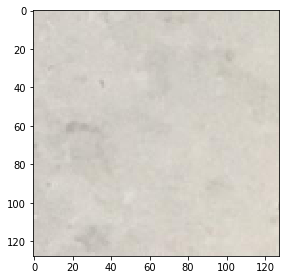

1.0


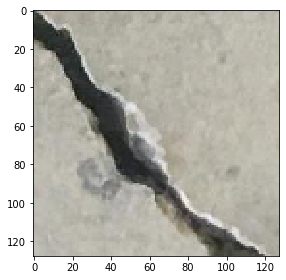

0.0


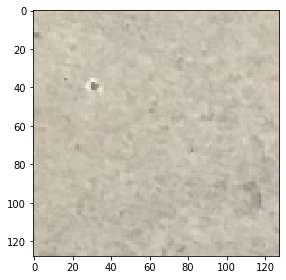

1.0


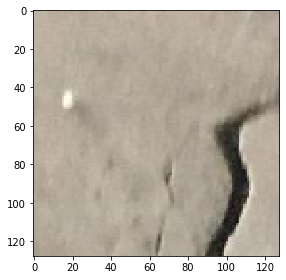

0.0


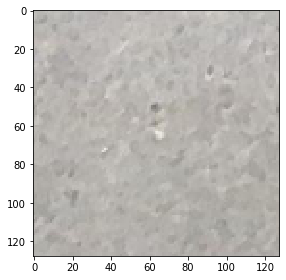

0.0


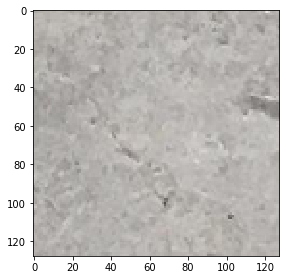

1.0


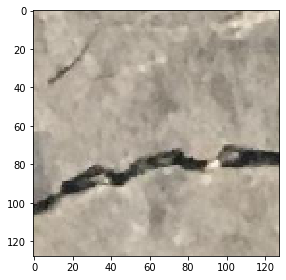

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sample_training_images_batch,y_batch = train_data_gen.next()

print(len(sample_training_images_batch))
for i in range(0,len(sample_training_images_batch)):
    image = sample_training_images_batch[i]
    print(y_batch[i])
    imshow(image)
    

In [20]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch= batch_size,
    epochs=15, ## trying with lower epocs
    validation_data=validation_generator,
    validation_steps= batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 [==============================] - 226s 2s/step - loss: 0.4455 - accuracy: 0.8356 - val_loss: 0.1409 - val_accuracy: 0.9617
Epoch 2/15
100/100 [==============================] - 230s 2s/step - loss: 0.1152 - accuracy: 0.9705 - val_loss: 0.0741 - val_accuracy: 0.9810
Epoch 3/15
100/100 [==============================] - 261s 3s/step - loss: 0.0811 - accuracy: 0.9785 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 4/15
100/100 [==============================] - 265s 3s/step - loss: 0.0750 - accuracy: 0.9799 - val_loss: 0.0501 - val_accuracy: 0.9832
Epoch 5/15
100/100 [==============================] - 277s 3s/step - loss: 0.0685 - accuracy: 0.9803 - val_loss: 0.0429 - val_accuracy: 0.9863
Epoch 6/15
100/100 [==============================] - 330s 3s/step - loss: 0.0623 - accuracy: 0.9843 - val_loss: 0.0442 - val_accuracy: 0.9877
Epoch 7/15
100/100 [==============================] - 332s 3s/step

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


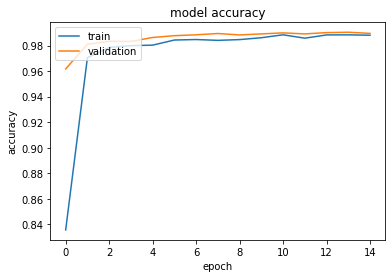

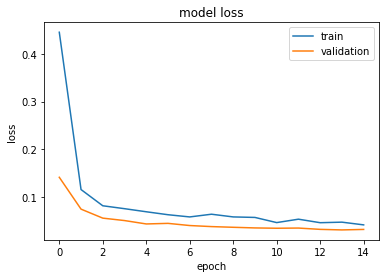

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [23]:
model.save("model.h5")

In [26]:
import flask as Flask

app = Flask(__name__)

@app.route('/')
def entry_page():
    #Jinja template of the webpage
    return render_template('index.html')

@app.route('/predict_object/', methods=['GET', 'POST'])
def render_message():
    #Loading CNN model
    saved_model = 'saved_models/tuned_model_fin.h5'
    model = load_model(saved_model)
    
    try:
        #Get image URL as input
        image_url = request.form['image_url']
        image = io.imread(image_url)
        
        #Apply same preprocessing used while training CNN model
        image_small = st.resize(image, (32,32,3))
        x = np.expand_dims(image_small.transpose(2, 0, 1), axis=0)
        
        #Call classify function to predict the image class using the loaded CNN model
        final,pred_class = classify(x, model)
        print(pred_class)
        print(final)
        
        #Store model prediction results to pass to the web page
        message = "Model prediction: {}".format(pred_class)
        print('Python module executed successfully')
        
    except Exception as e:
        #Store error to pass to the web page
        message = "Error encountered. Try another image. ErrorClass: {}, Argument: {} and Traceback details are: {}".format(e.__class__,e.args,e.__doc__)
        final = pd.DataFrame({'A': ['Error'], 'B': [0]})
        
    #Return the model results to the web page
    return render_template('index.html',
                            message=message,
                            data=final.round(decimals=2),
                            image_url=image_url)


TypeError: 'module' object is not callable